**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

**Note**: You are **ALLOWED** to use Generative AI for this notebook, but you must properly cite your usage. Be sure to review the syllabus for details on citation requirements and the consequences of failing to cite your sources correctly or simply copy-pasting without meaningful engagement.

#Analysis of Police Killings

##EDA

In this notebook, we will analyze data on **police killings in the USA** to uncover key insights. More details about the dataset can be found [here](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-police-killings-dataset/data).

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
### DO NOT CHANGE THIS CODE###

url = "https://drive.google.com/uc?export=download&id=10hVyprUpxHmLBZRGuRQGB5VhUBeCig9P"

# Read the CSV file into a DataFrame
df = pd.read_csv(url,encoding="latin1")

df = df[["age", "gender", "raceethnicity", "year", "state", "latitude", "longitude", "cause", "armed", "county_income", "college"]]
df.dropna(inplace=True)
df.drop("year", axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df = df[df["age"] != "Unknown"]
df["age"] = df["age"].apply(lambda x: int(x))

df

,age,gender,raceethnicity,state,latitude,longitude,cause,armed,county_income,college
0,16,Male,Black,AL,32.529577,-86.362829,Gunshot,No,54766,0.168510
1,27,Male,White,LA,31.321739,-92.434860,Gunshot,No,40930,0.111402
2,26,Male,White,WI,42.583560,-87.835710,Gunshot,No,54930,0.147312
3,25,Male,Hispanic/Latino,CA,33.939298,-118.219463,Gunshot,Firearm,55909,0.050133
4,29,Male,White,OH,41.148575,-81.429878,Gunshot,No,49669,0.403954
...,...,...,...,...,...,...,...,...,...,...
462,18,Male,Black,VA,36.829014,-76.341438,Gunshot,No,46166,0.120553
463,28,Male,Native American,WA,48.708542,-119.436829,Taser,Firearm,40368,0.174525
464,52,Male,White,NC,35.205776,-81.240669,Gunshot,Firearm,42017,0.072764
465,38,Female,Black,CA,37.827129,-122.284492,Gunshot,Firearm,72112,0.396476


Plotting the correlation between numerical variables

<Axes: >

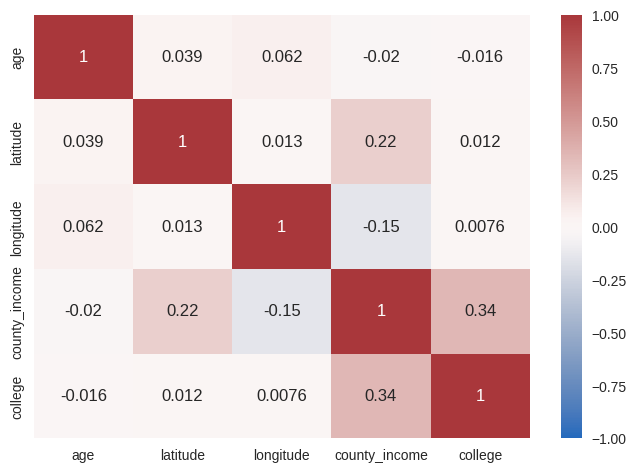

In [17]:
corr = df.corr( numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag", vmin=-1, vmax=1)

## Question 1 **(5 Points)**

Create 2D visualizations to compare the distribution of the data for Black and White groups separately, ensuring that the visualizations accurately reflect the data *without distortion*.  **(3 Point)**

Once you generate these visualizations, answer the following:  
- Identify any **interesting and interpretable insights**. Explain how these findings were inferred.   **(1 Point)**
- Assess how **reliable** these visualizations are in providing a **complete** picture of the data distribution. Justify your answer.  **(1 Point)**

💡 *Hint:* Consider writing a **function** for this task, as you may need to repeat it with variations (e.g., different features or value ranges).

We will drop categorical columns before PCA

In [18]:
!pip install psynlig

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.features import PCA as PCA_visualizer
from psynlig import pca_loadings_map

# Standardizing the data (important for PCA)
scaler = StandardScaler()

def pca_and_visualize(feature, values):
  # Drop categorical features
  sub_df = df[df[feature].apply(lambda x: x in values)]
  categorical_columns = [ 'gender', 'raceethnicity', 'state','armed','cause']
  df_numerical = sub_df.drop(columns=categorical_columns)

  #Normalize
  df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)
  df_scaled

  # Initializing PCA
  pca = PCA(2)

  # Applying PCA to the scaled data
  df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

  print("Explained variance = ", pca.explained_variance_ratio_)

  # Visualize loadings
  visualizer = PCA_visualizer(featureslist=df_numerical.columns,
                              projection=2,
                              proj_features=True,
                              heatmap=True
                              )
  visualizer.fit_transform(pd.DataFrame(df_numerical, columns=df_numerical.columns))
  visualizer.show()

  # Visualize loadings in terms of features
  kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'RdBu_r',
    },
    'text': {
        'fontsize': 'small',
    },
  }

  pca_loadings_map(
      pca,
      df_numerical,
      textcolors=['white', 'black'],
      **kwargs
  )


Explained variance =  [0.30390285 0.22061676]


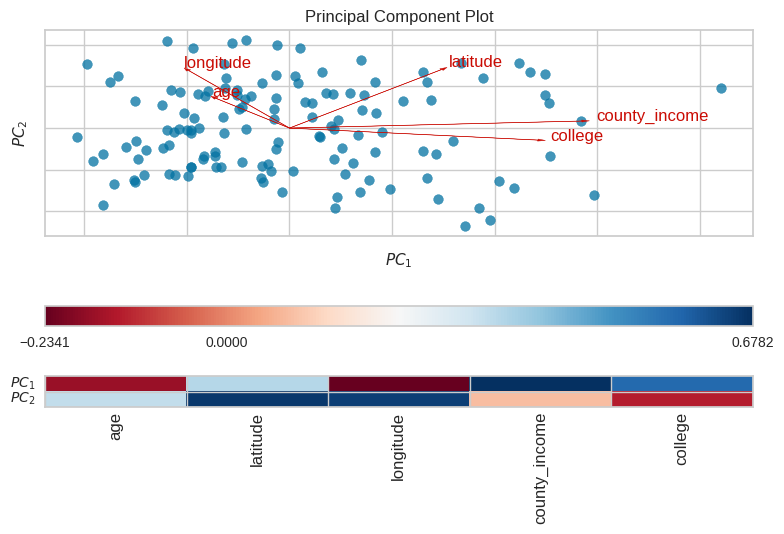

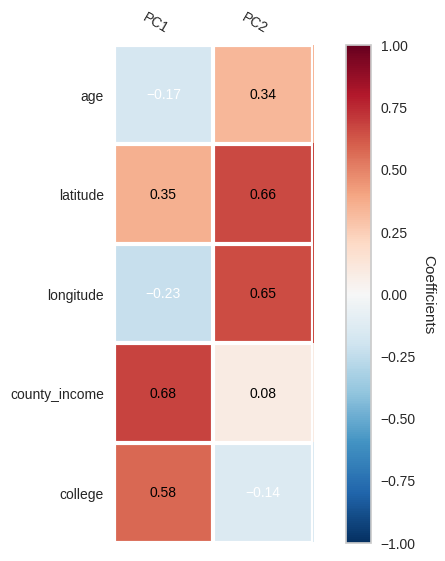

In [20]:
pca_and_visualize("raceethnicity", ["Black"])

Explained variance =  [0.28865414 0.21112731]


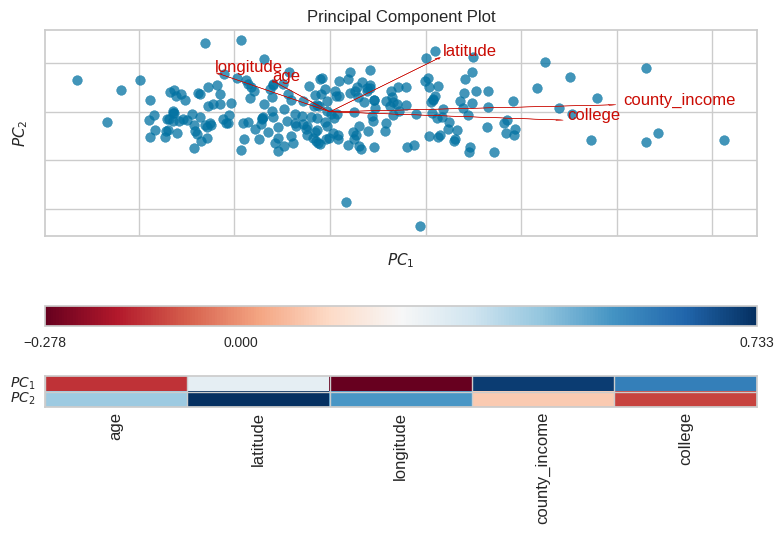

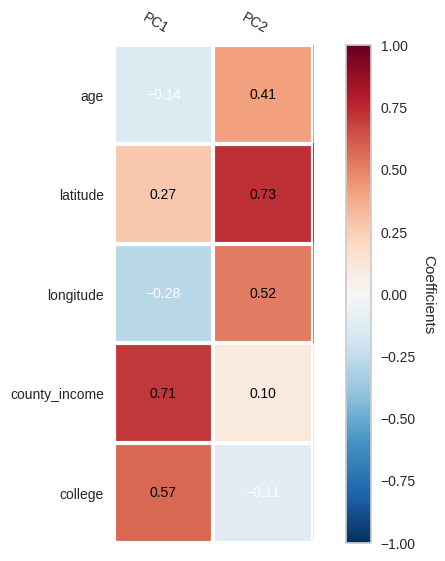

In [21]:
pca_and_visualize("raceethnicity", ["White"])

In both demographics, the first two principal components (PC1 and PC2) together explain roughly 50% of the variance in the data.

* PC1 is mostly driven by county Income and the percentage of the population with college degree. It may represent a socioeconomic axis, spanning from educated high-income populations to less educated low-income ones.
* PC2 is largely influenced by geographical information, specifically latitude, where the data mostly spans from NorthEast to SouthWest.

Finally, there seems to be no fundamental difference in the distribution of police killings between black and white individuals.

However, since the 2 PCs only account for 50% of the variation in the data, they do not give a solid account of the data as a whole.


##Question 2 **(5 Points)**

Repeat the previous analysis in Question 1, but this time compare **police killings in Blue vs. Red states** based on the state designations found [here](https://www.jagranjosh.com/general-knowledge/red-and-blue-states-in-us-1701677972-1).  **(2 Points)**

After visualizing the distributions:  
- Identify any **notable insights** from the comparison and explain how they were inferred.  **(1.5 Point)**
- Assess how **effective dimensionality reduction** was in this context. Support your stance using findings from both the visualizations and the earlier exploratory data analysis (EDA). **(1.5 Point)**

Explained variance =  [0.29869573 0.28562585]


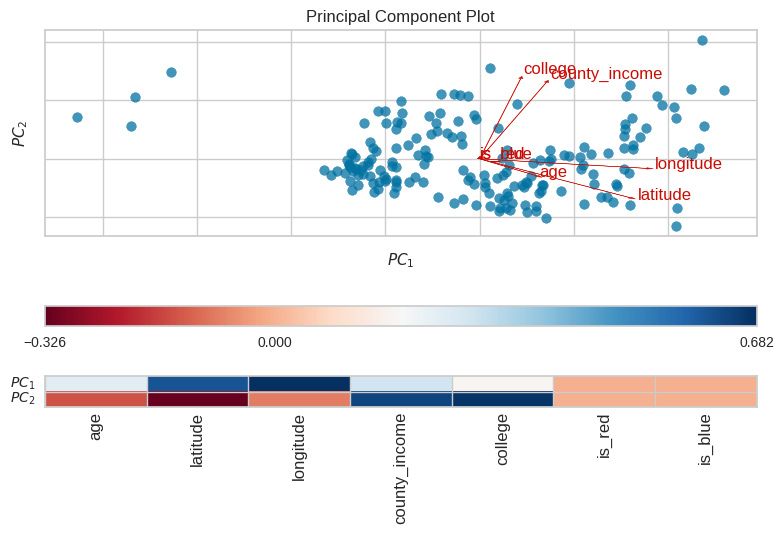

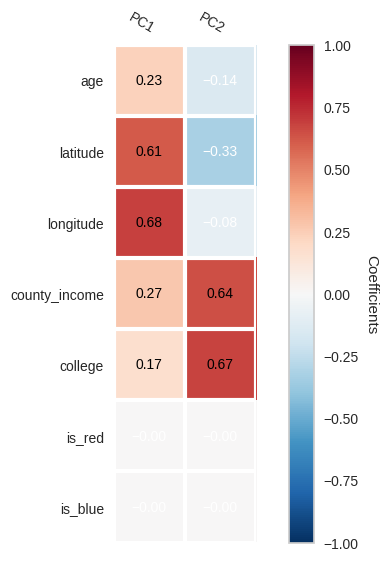

In [34]:
# We make assumptions about dem vs. republican states.
blue_states = ["CA", "ME", "OR", "CO", "MD", "RI", "CT", "MA", "VT", "DE", "NH", "VA", "DC", "NJ", "WA", "HI", "NM", "IL", "NY"]
red_states = ["AL", "KS", "NE", "TX", "AK", "LA", "OK", "WV", "ID", "MS", "SC", "WY", "IN", "MI", "SD", "IO", "MN", "TN"]

pca_and_visualize("state", blue_states)

Explained variance =  [0.33255221 0.22541888]


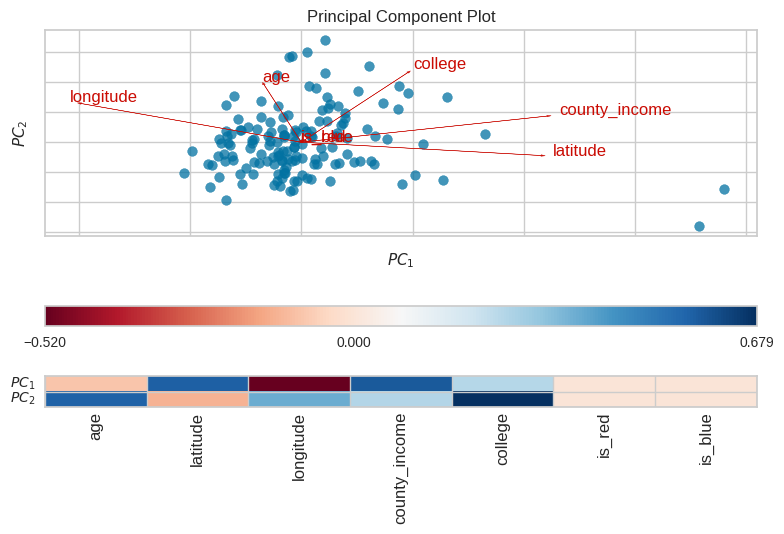

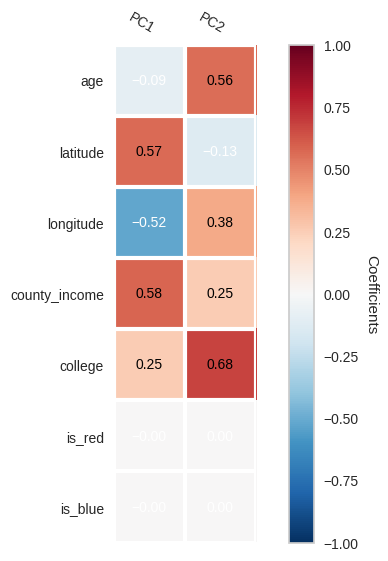

In [35]:
pca_and_visualize("state", red_states)

In [39]:
import plotly.express as px

df_blue_or_red = df[df["state"].apply(lambda x: x in red_states + blue_states)]
df_blue_or_red["is_blue"] = df_blue_or_red["state"].apply(lambda x: x in blue_states)

fig = px.scatter_geo(df_blue_or_red, lat = "latitude", lon="longitude",
                     color="is_blue", scope="usa", color_discrete_map={False: "red", True: "blue"})
fig.show()

<ipython-input-39-bff2fe224f65>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Here, we can see that for the blue states, the data varies primarily along the NorthEast/SouthWest axis because most blue state police killing incidents are either in the NorthEast or in California. The second most relevant dimension is socio-economics.

The red states tell a different story. They vary along the NorthWest/SouthEast axis, which makes sense looking at the map. However, contrary to blue states, county income varries significantly along this axis without much variation in education.

Still, only around 50% of the data is explained in these plots, which does not inspire much confidence.

The reason this is happening is that, looking at the EDA, the dimensions of this dataset are quite uncorrelated, leaving very little room for benefiting from a linear dimensionality reduction technique such as PCA.

##Question 3 **(5 Points)**

Analyze police killings in the USA and identify specific **demographics (in terms of race, ethnicity, and state)** that meet the following criteria:  

1. **Account for more than 5%** of all police killings in the USA.  
2. **Exhibit an unusual association** with police **shootings** compared to their representation in the general population.  


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

categorical_columns = [  'raceethnicity', 'state','cause' ]

categorical_df = df[categorical_columns].values.tolist()

# Transform data
te = TransactionEncoder()
transactions = te.fit_transform(categorical_df)

# Create a dataframe from the data
df_encoded = pd.DataFrame(transactions, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)


rules = association_rules(frequent_itemsets, num_itemsets=frequent_itemsets.shape[0])
rules = rules[rules["lift"] >  1]
rules = rules[rules["antecedents"].apply(lambda x: set(x).issubset( list(df["raceethnicity"].unique()) + list(df["state"].unique())  ))]
rules = rules[rules["consequents"].apply(lambda x: set(x).issubset(["Gunshot"] ))]

rules.sort_values(by=["lift", "support"], ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(AZ),(Gunshot),0.054230,0.878525,0.054230,1.000000,1.138272,1.0,0.006588,inf,0.128440,0.061728,1.000000,0.530864
7,"(CA, Hispanic/Latino)",(Gunshot),0.054230,0.878525,0.054230,1.000000,1.138272,1.0,0.006588,inf,0.128440,0.061728,1.000000,0.530864
4,(Hispanic/Latino),(Gunshot),0.143167,0.878525,0.136659,0.954545,1.086532,1.0,0.010884,2.672451,0.092948,0.154412,0.625812,0.555051
2,(CA),(Gunshot),0.160521,0.878525,0.147505,0.918919,1.045979,1.0,0.006484,1.498192,0.052364,0.165450,0.332529,0.543410
5,(TX),(Gunshot),0.093275,0.878525,0.084599,0.906977,1.032386,1.0,0.002654,1.305857,0.034597,0.095355,0.234219,0.501637
6,(White),(Gunshot),0.509761,0.878525,0.462039,0.906383,1.031710,1.0,0.014201,1.297574,0.062695,0.498829,0.229331,0.716154
8,"(White, CA)",(Gunshot),0.058568,0.878525,0.052061,0.888889,1.011797,1.0,0.000607,1.093275,0.012385,0.058824,0.085317,0.474074


From the table, we can see two major demographics that especially suffer from police shootings relative to the general population:
- Arizona
- Hispanics residing in California.

Further investigation is warrnated to understand the causes behind the bias in police shootings compared to the rest of the population where police shootings are responsible for relatively fewer deaths.